# KELOMPOK 2

HASAN ADE MUHARNOV
HASBI YUDDIN MATONDANG
HELEN K SINURAT
YUNDA ANDRIYANI
HILDA AYU TAMARA

In [1]:
import tweepy
from tweepy import Cursor
import csv
import pandas as pd
#from tweepy import OAuthHandler
 
consumer_key = '0oQfX6LQfSR2Sj5YpwOlTOZsW'
consumer_secret = 'HfUxGwaveQoHr6NeBq4ViZeX7xKZOBBDbBeD8yB36VZbWsf5Jm'
access_token = '905245651-vi4SrkwLgBGgTqYyWnyPTy71w6GDYOuSf9sOAPW5'
access_secret = 'JzL5RzFcmi3ciad7BfDYagGhXuA3FUF6GMTQKyI7azlJS'

def connect_to_twitter_OAuth(): # a function
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    api = tweepy.API(auth) # melakukan koneksi dengan menggunakan variabel api
    return api

api = connect_to_twitter_OAuth()

In [ ]:
csvFile = open('tweet-cnn-indo.csv', 'a') # 'a' for append utk menambahkan, bisa juga 'w' for write (file lama akan ditimpa)
csvWriter = csv.writer(csvFile)

for tweet in Cursor(api.user_timeline, screen_name='CNNIndonesia').items(2000):
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

In [2]:
df = pd.read_csv("tweet-cnn-indo.csv", header=None)
df.columns = ['created_at', 'tweet']
df.head()

,created_at,tweet
0,2019-08-26 08:27:34,b'Kadin Ajak Pelaku Usaha Dukung Pemindahan Ib...
1,2019-08-26 08:21:34,b'Pasutri Tewas dalam Tabrakan Usai Gelar Rese...
2,2019-08-26 08:21:34,b'Parabadminton Indonesia Raih 4 Emas di Kejua...
3,2019-08-26 08:15:34,"b'Kehangatan Ahok, Djarot, Anies, dan Lulung s..."
4,2019-08-26 08:15:33,"b'Ibu Kota Baru di Kaltim, LIPI Sebut Lebih Po..."


In [3]:
df.drop_duplicates(subset =["tweet"], keep = False, inplace = True) 

In [4]:
i = 0
tweet_char = []
for column in df.tweet:
    tweet_char.insert(i, len(df["tweet"][i]))
    i+=1

In [5]:
#df["tweet"][0][2:len(df["tweet"][0])-1]
i = 0
rm_b = [] #menyimpa tweet yg telah dihapus karakter 'b'
for twit in df.tweet:
    rm_b.insert(i, twit[2:len(df["tweet"][i])-1])
    i+=1

In [6]:
df["tweet_clean"] = rm_b 
df.head(10)

,created_at,tweet,tweet_clean
0,2019-08-26 08:27:34,b'Kadin Ajak Pelaku Usaha Dukung Pemindahan Ib...,Kadin Ajak Pelaku Usaha Dukung Pemindahan Ibu ...
1,2019-08-26 08:21:34,b'Pasutri Tewas dalam Tabrakan Usai Gelar Rese...,Pasutri Tewas dalam Tabrakan Usai Gelar Reseps...
2,2019-08-26 08:21:34,b'Parabadminton Indonesia Raih 4 Emas di Kejua...,Parabadminton Indonesia Raih 4 Emas di Kejuara...
3,2019-08-26 08:15:34,"b'Kehangatan Ahok, Djarot, Anies, dan Lulung s...","Kehangatan Ahok, Djarot, Anies, dan Lulung saa..."
4,2019-08-26 08:15:33,"b'Ibu Kota Baru di Kaltim, LIPI Sebut Lebih Po...","Ibu Kota Baru di Kaltim, LIPI Sebut Lebih Pote..."
5,2019-08-26 08:09:33,"b'Ibu Kota Baru, Negara Hanya Gelontorkan Rp88...","Ibu Kota Baru, Negara Hanya Gelontorkan Rp88 T..."
6,2019-08-26 08:03:33,"b""'The Most Ordinary Romance', Reuni Gong Hyo ...","'The Most Ordinary Romance', Reuni Gong Hyo Ji..."
7,2019-08-26 08:03:33,b'Sederet Makanan Sehat Pembakar Lemak https:/...,Sederet Makanan Sehat Pembakar Lemak https://t...
8,2019-08-26 07:57:32,"b'Mengenal Penajam Paser Utara dan Kukar, Ibu ...","Mengenal Penajam Paser Utara dan Kukar, Ibu Ko..."
9,2019-08-26 07:51:32,b'Thailand Memulai Era Safari Gajah yang Lebih...,Thailand Memulai Era Safari Gajah yang Lebih M...


In [7]:
import re
import preprocessor as p
#from string import punctuation

rm_regex = []
i=0
for tweet in df.tweet_clean:
    tweet = re.sub(r'((\\x[a-z0-9]{1,}){1,})', '', tweet)
    tweet = re.sub(r"http\S+", '', tweet)
    tweet = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)','', tweet)
    tweet = p.clean(tweet)
    rm_regex.insert(i, tweet)
    i+=1

In [8]:
df["tweet_clean"] = rm_regex
df.head(10)

,created_at,tweet,tweet_clean
0,2019-08-26 08:27:34,b'Kadin Ajak Pelaku Usaha Dukung Pemindahan Ib...,Kadin Ajak Pelaku Usaha Dukung Pemindahan Ibu ...
1,2019-08-26 08:21:34,b'Pasutri Tewas dalam Tabrakan Usai Gelar Rese...,Pasutri Tewas dalam Tabrakan Usai Gelar Reseps...
2,2019-08-26 08:21:34,b'Parabadminton Indonesia Raih 4 Emas di Kejua...,Parabadminton Indonesia Raih Emas di Kejuaraan...
3,2019-08-26 08:15:34,"b'Kehangatan Ahok, Djarot, Anies, dan Lulung s...",Kehangatan Ahok Djarot Anies dan Lulung saat B...
4,2019-08-26 08:15:33,"b'Ibu Kota Baru di Kaltim, LIPI Sebut Lebih Po...",Ibu Kota Baru di Kaltim LIPI Sebut Lebih Poten...
5,2019-08-26 08:09:33,"b'Ibu Kota Baru, Negara Hanya Gelontorkan Rp88...",Ibu Kota Baru Negara Hanya Gelontorkan Rp88 T
6,2019-08-26 08:03:33,"b""'The Most Ordinary Romance', Reuni Gong Hyo ...",The Most Ordinary Romance Reuni Gong Hyo Jin K...
7,2019-08-26 08:03:33,b'Sederet Makanan Sehat Pembakar Lemak https:/...,Sederet Makanan Sehat Pembakar Lemak
8,2019-08-26 07:57:32,"b'Mengenal Penajam Paser Utara dan Kukar, Ibu ...",Mengenal Penajam Paser Utara dan Kukar Ibu Kot...
9,2019-08-26 07:51:32,b'Thailand Memulai Era Safari Gajah yang Lebih...,Thailand Memulai Era Safari Gajah yang Lebih M...


In [9]:
csv_tweet = df.to_csv("tweet-cnn-indo.csv")

In [11]:
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()

tweet_token = []
i=0
for tweet in df.tweet_clean:
    tweet = tokenizer.tokenize(tweet)
    tweet_token.insert(i, tweet)
    i+=1
    

tweet_token

[['Kadin', 'Ajak', 'Pelaku', 'Usaha', 'Dukung', 'Pemindahan', 'Ibu', 'Kota'],
 ['Pasutri',
  'Tewas',
  'dalam',
  'Tabrakan',
  'Usai',
  'Gelar',
  'Resepsi',
  'Pernikahan'],
 ['Parabadminton', 'Indonesia', 'Raih', 'Emas', 'di', 'Kejuaraan', 'Dunia'],
 ['Kehangatan',
  'Ahok',
  'Djarot',
  'Anies',
  'dan',
  'Lulung',
  'saat',
  'Berjumpa'],
 ['Ibu',
  'Kota',
  'Baru',
  'di',
  'Kaltim',
  'LIPI',
  'Sebut',
  'Lebih',
  'Potensi',
  'Gempa'],
 ['Ibu', 'Kota', 'Baru', 'Negara', 'Hanya', 'Gelontorkan', 'Rp88', 'T'],
 ['The',
  'Most',
  'Ordinary',
  'Romance',
  'Reuni',
  'Gong',
  'Hyo',
  'Jin',
  'Kim',
  'Rae',
  'Won'],
 ['Sederet', 'Makanan', 'Sehat', 'Pembakar', 'Lemak'],
 ['Mengenal',
  'Penajam',
  'Paser',
  'Utara',
  'dan',
  'Kukar',
  'Ibu',
  'Kota',
  'Baru',
  'RI'],
 ['Thailand',
  'Memulai',
  'Era',
  'Safari',
  'Gajah',
  'yang',
  'Lebih',
  'Manusiawi'],
 ['BreakingNewsnnGubernur',
  'Kaltim',
  'Isran',
  'Noor',
  'Kalau',
  'kami',
  'semua',
  'siap

In [12]:
token = []
for i in tweet_token:
    for item in i:
        token.append(item)
token

['Kadin',
 'Ajak',
 'Pelaku',
 'Usaha',
 'Dukung',
 'Pemindahan',
 'Ibu',
 'Kota',
 'Pasutri',
 'Tewas',
 'dalam',
 'Tabrakan',
 'Usai',
 'Gelar',
 'Resepsi',
 'Pernikahan',
 'Parabadminton',
 'Indonesia',
 'Raih',
 'Emas',
 'di',
 'Kejuaraan',
 'Dunia',
 'Kehangatan',
 'Ahok',
 'Djarot',
 'Anies',
 'dan',
 'Lulung',
 'saat',
 'Berjumpa',
 'Ibu',
 'Kota',
 'Baru',
 'di',
 'Kaltim',
 'LIPI',
 'Sebut',
 'Lebih',
 'Potensi',
 'Gempa',
 'Ibu',
 'Kota',
 'Baru',
 'Negara',
 'Hanya',
 'Gelontorkan',
 'Rp88',
 'T',
 'The',
 'Most',
 'Ordinary',
 'Romance',
 'Reuni',
 'Gong',
 'Hyo',
 'Jin',
 'Kim',
 'Rae',
 'Won',
 'Sederet',
 'Makanan',
 'Sehat',
 'Pembakar',
 'Lemak',
 'Mengenal',
 'Penajam',
 'Paser',
 'Utara',
 'dan',
 'Kukar',
 'Ibu',
 'Kota',
 'Baru',
 'RI',
 'Thailand',
 'Memulai',
 'Era',
 'Safari',
 'Gajah',
 'yang',
 'Lebih',
 'Manusiawi',
 'BreakingNewsnnGubernur',
 'Kaltim',
 'Isran',
 'Noor',
 'Kalau',
 'kami',
 'semua',
 'siap',
 'Masyarakat',
 'siap',
 'pemerintah',
 'daerah',


In [13]:
lower_case = [word.lower() for word in token]

In [16]:
from stop_words import get_stop_words

stop_words = get_stop_words('indonesian')
add_stop = ['jadi', 'untuk']
stop_words.extend(add_stop)

filtered_words = [w for w in lower_case if not w in stop_words] 
filtered_words

['kadin',
 'ajak',
 'pelaku',
 'usaha',
 'dukung',
 'pemindahan',
 'ibu',
 'kota',
 'pasutri',
 'tewas',
 'tabrakan',
 'usai',
 'gelar',
 'resepsi',
 'pernikahan',
 'parabadminton',
 'indonesia',
 'raih',
 'emas',
 'kejuaraan',
 'dunia',
 'kehangatan',
 'ahok',
 'djarot',
 'anies',
 'lulung',
 'berjumpa',
 'ibu',
 'kota',
 'baru',
 'kaltim',
 'lipi',
 'sebut',
 'potensi',
 'gempa',
 'ibu',
 'kota',
 'baru',
 'negara',
 'gelontorkan',
 'rp88',
 't',
 'the',
 'most',
 'ordinary',
 'romance',
 'reuni',
 'gong',
 'hyo',
 'jin',
 'kim',
 'rae',
 'won',
 'sederet',
 'makanan',
 'sehat',
 'pembakar',
 'lemak',
 'mengenal',
 'penajam',
 'paser',
 'utara',
 'kukar',
 'ibu',
 'kota',
 'baru',
 'ri',
 'thailand',
 'memulai',
 'era',
 'safari',
 'gajah',
 'manusiawi',
 'breakingnewsnngubernur',
 'kaltim',
 'isran',
 'noor',
 'siap',
 'masyarakat',
 'siap',
 'pemerintah',
 'daerah',
 'siap',
 'nn',
 'pengusaha',
 'minta',
 'bank',
 'tekan',
 'margin',
 'bunga',
 'bersih',
 'persen',
 'drone',
 'jat

In [17]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

tokens = [stemmer.stem(token) for token in filtered_words]
print(tokens)

['kadin', 'ajak', 'laku', 'usaha', 'dukung', 'pindah', 'ibu', 'kota', 'pasutri', 'tewas', 'tabrak', 'usai', 'gelar', 'resepsi', 'nikah', 'parabadminton', 'indonesia', 'raih', 'emas', 'juara', 'dunia', 'hangat', 'ahok', 'djarot', 'anies', 'lulung', 'jumpa', 'ibu', 'kota', 'baru', 'kaltim', 'lipi', 'sebut', 'potensi', 'gempa', 'ibu', 'kota', 'baru', 'negara', 'gelontor', 'rp88', 't', 'the', 'most', 'ordinary', 'romance', 'reuni', 'gong', 'hyo', 'jin', 'kim', 'rae', 'won', 'deret', 'makan', 'sehat', 'bakar', 'lemak', 'kenal', 'najam', 'paser', 'utara', 'kukar', 'ibu', 'kota', 'baru', 'ri', 'thailand', 'mulai', 'era', 'safari', 'gajah', 'manusiawi', 'breakingnewsnngubernur', 'kaltim', 'isran', 'noor', 'siap', 'masyarakat', 'siap', 'perintah', 'daerah', 'siap', 'nn', 'usaha', 'minta', 'bank', 'tekan', 'margin', 'bunga', 'bersih', 'persen', 'drone', 'jatuh', 'beirut', 'libanon', 'hizbullah', 'kecam', 'israel', 'fakta', 'penting', 'usai', 'rins', 'kalah', 'marquez', 'motogp', 'inggris', 'komi

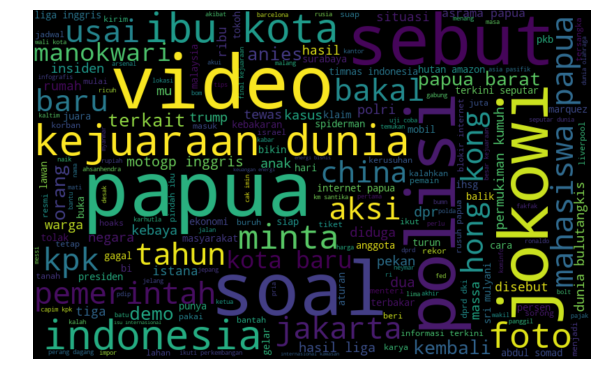

In [20]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in filtered_words])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [21]:
import nltk
from collections import Counter

counts = Counter(filtered_words)
shorted_counts = sorted(counts.items(), key = lambda count: count[1], reverse = True)

In [22]:
import numpy as np
words = []
count_words = []

for wc in shorted_counts:
    words.append(wc[0])
    count_words.append(wc[1])

In [23]:
top_words = words[:5]
top_count = count_words[:5]
top_count

[213, 114, 100, 87, 83]

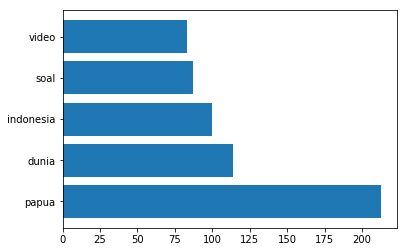

In [25]:
y_pos = np.arange(len(top_words))

plt.barh(y_pos, top_count, align='center')
plt.yticks(y_pos, top_words)

plt.show()

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')
tf = vectorizer.fit_transform(filtered_words).toarray()

In [27]:
tf

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
tf_feature_names = vectorizer.get_feature_names()
tf_feature_names

['aksi',
 'anies',
 'as',
 'asrama',
 'atas',
 'bakal',
 'barat',
 'baru',
 'berita',
 'besar',
 'bulutangkis',
 'china',
 'demo',
 'dki',
 'dpr',
 'dprd',
 'dua',
 'dunia',
 'ekonomi',
 'foto',
 'hasil',
 'hong',
 'hutan',
 'ibu',
 'indonesia',
 'informasi',
 'inggris',
 'jakarta',
 'jokowi',
 'kebaya',
 'kejuaraan',
 'kembali',
 'kong',
 'kota',
 'kpk',
 'kumuh',
 'liga',
 'mahasiswa',
 'manokwari',
 'minta',
 'mobil',
 'motogp',
 'negara',
 'orang',
 'papua',
 'pekan',
 'pemerintah',
 'polisi',
 'sebut',
 'seputar',
 'soal',
 'tahun',
 'terkait',
 'terkini',
 'usai',
 'video',
 'warga']

In [30]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters = k, n_init = 20, n_jobs = 1)
kmeans.fit(tf)

common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print('Cluster ' + str(num) + ' : ' + ', '.join(tf_feature_names[filtered_words] for filtered_words in centroid))

Cluster 0 : indonesia, video, kota, polisi, sebut, ibu, minta, kejuaraan, baru, jakarta, hasil, kpk, inggris, aksi, terkini, liga, mahasiswa, foto, as, warga, manokwari, dki, tahun, seputar, kumuh
Cluster 1 : jokowi, dunia, kota, sebut, jakarta, soal, kejuaraan, terkini, demo, hong, kong, aksi, indonesia, motogp, pemerintah, bakal, atas, asrama, kpk, inggris, hutan, dua, china, berita, barat
Cluster 2 : dunia, soal, jokowi, jakarta, sebut, kejuaraan, aksi, hong, demo, kong, barat, informasi, china, indonesia, mahasiswa, foto, pemerintah, bakal, motogp, kpk, inggris, kota, pekan, dua, hutan
Cluster 3 : papua, soal, ibu, minta, jakarta, usai, kejuaraan, as, dprd, bulutangkis, warga, besar, anies, mobil, terkini, hong, kong, demo, atas, asrama, indonesia, kpk, inggris, dpr, dua
Cluster 4 : soal, jokowi, sebut, kota, dunia, jakarta, kejuaraan, terkini, demo, hong, kong, aksi, indonesia, motogp, bakal, pemerintah, china, barat, kpk, informasi, inggris, hutan, negara, dpr, dua


In [31]:
kmeans.fit(tf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

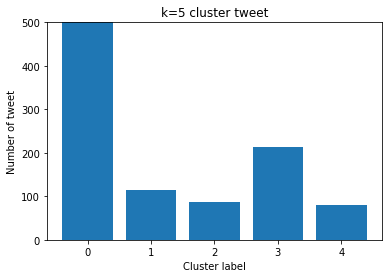

In [34]:
plt.bar(range(len(set(kmeans.labels_))), np.bincount(kmeans.labels_))

plt.ylabel('Number of tweet')
plt.xlabel('Cluster label')
plt.title('k={} cluster tweet'.format(k));

plt.ylim(0,500)
plt.show()